
# Data Scientist Screening Exercise – Relevant Research

This notebook documents the data cleaning, analysis, and visualization performed on the
ICE immigration detention facilities dataset as part of the Data Scientist screening exercise.

The goal is to identify and visualize the **top 10 largest detention facilities by total population**
after cleaning a messy real-world administrative dataset.


## 1. Load Data
This section loads the raw CSV file and addresses encoding and structural issues.

In [26]:
import pandas as pd
# Load CSV without headers and using latin1 encoding due to non-UTF-8 characters in the file
df_raw= pd.read_csv("..\\data\\raw\\messy_ice_detention.csv", header=None, encoding="latin1")

## 2. Data Cleaning
This section documents all cleaning steps, including header fixes, encoding artifacts, numeric conversion, date handling.

In [27]:
# Remove metadata rows and set proper header
df=df_raw.iloc[6:].reset_index(drop=True) # Drop the first six metadata rows present before the actual column headers
df.columns= df.iloc[0]   # Assign the first data row as column headers
df = df.iloc[1:].reset_index(drop=True) # Remove the header row from the data and reset the index
df.head()  # Preview the first few rows of the cleaned dataframe to verify structure

,Name,City,State,Level A,Level B,Level C,Level D,Last Inspection End Date
0,ADAMS COUNTY DET CENTER,NATCHEZ,MS,1876.461078,266.4311377,6.724550898,4.25748503,45673
1,ADELANTO ICE PROCESSING CENTER,ADELANTO,CA,6.401197605,4.323353293,22.60479042,32.63473054,45491
2,ALAMANCE COUNTY DETENTION FACILITY,GRAHAM,NC,4.329341317,3.461077844,6.083832335,6.185628743,45554
3,ALEXA$NDRIA STAGING FACILITY,ALEXANDRIA,LA,137.5209581,47.41317365,76.00598802,52.48502994,45533
4,ALLEGANY COUNTY JAIL,BELMONT,NY,1.221556886,1.80E-02,0,0,NaN


In [28]:
df.info() # Check column types and missing values before conversion

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Name                      134 non-null    object
 1   City                      134 non-null    object
 2   State                     134 non-null    object
 3   Level A                   134 non-null    object
 4   Level B                   134 non-null    object
 5   Level C                   134 non-null    object
 6   Level D                   134 non-null    object
 7   Last Inspection End Date  117 non-null    object
dtypes: object(8)
memory usage: 8.5+ KB


In [29]:
# Replace any character that is NOT a letter or space with an empty string in the 'Name' column 
df['Name'] = df['Name'].str.replace(r'[^A-Za-z ]+', '', regex=True)
# Inspect population columns to identify formatting issues and missing values before cleaning
print(df[['Level A', 'Level B', 'Level C', 'Level D']].head())

0      Level A      Level B      Level C      Level D
0  1876.461078  266.4311377  6.724550898   4.25748503
1  6.401197605  4.323353293  22.60479042  32.63473054
2  4.329341317  3.461077844  6.083832335  6.185628743
3  137.5209581  47.41317365  76.00598802  52.48502994
4  1.221556886     1.80E-02            0            0


In [30]:
# Define the Level population columns to be cleaned
level_cols = ['Level A', 'Level B', 'Level C', 'Level D']

#Function to safely convert Level A-Level D population values to float

def change_to_float(s):
    if pd.isna(s):
        return 0.0

    try:
        return float(s)
    except ValueError:
        return 0.0


for col in level_cols:
  df[col] = df[col].apply(change_to_float) # Apply the conversion function to each Level column

# Verify Level columns are numeric after cleaning
print(df[level_cols].dtypes)


0
Level A    float64
Level B    float64
Level C    float64
Level D    float64
dtype: object


In [31]:
# Convert Excel serial dates to datetime
df['Last Inspection End Date'] = pd.to_numeric(
    df['Last Inspection End Date'],
    errors='coerce'
)

df['Last Inspection End Date'] = pd.to_datetime(
    df['Last Inspection End Date'],
    origin='1899-12-30',
    unit='D'
)
"""Inspection dates were stored as Excel serial numbers and converted to 
datetime using Excel’s 1899-12-30 origin."""

'Inspection dates were stored as Excel serial numbers and converted to \ndatetime using Excel’s 1899-12-30 origin.'

In [32]:
print(df['Last Inspection End Date'].dtypes)

datetime64[ns]


In [33]:
# Preview the inspection end date column to verify successful date conversion
df['Last Inspection End Date'].head()

0   2025-01-16
1   2024-07-18
2   2024-09-19
3   2024-08-29
4          NaT
Name: Last Inspection End Date, dtype: datetime64[ns]

In [34]:
df.head(20)  #Preview the first 20 rows of cleaned dataset

,Name,City,State,Level A,Level B,Level C,Level D,Last Inspection End Date
0,ADAMS COUNTY DET CENTER,NATCHEZ,MS,1876.461078,266.431138,6.724551,4.257485,2025-01-16
1,ADELANTO ICE PROCESSING CENTER,ADELANTO,CA,6.401198,4.323353,22.604790,32.634731,2024-07-18
2,ALAMANCE COUNTY DETENTION FACILITY,GRAHAM,NC,4.329341,3.461078,6.083832,6.185629,2024-09-19
3,ALEXANDRIA STAGING FACILITY,ALEXANDRIA,LA,137.520958,47.413174,76.005988,52.485030,2024-08-29
4,ALLEGANY COUNTY JAIL,BELMONT,NY,1.221557,0.018000,0.000000,0.000000,NaT
5,ALLEN PARISH PUBLIC SAFETY COMPLEX,OBERLIN,LA,101.311377,30.251497,33.766467,10.664671,2024-12-12
6,ATLANTAUSPEN,ATLANTA,,17.341317,3.610778,3.053892,2.724551,NaT
7,BAKER COUNTY SHERIFF DEPT,MACCLENNY,FL,26.221557,38.640719,88.652695,88.730539,2024-10-24
8,BERLIN FED CORR INST,BERLIN,NH,1.748503,0.089800,0.970060,0.712575,NaT
9,BLUEBONNET DETENTION FACILITY,ANSON,TX,311.305389,164.550898,241.616767,104.514970,2024-12-12


## 3. Analysis
Here we compute total population by summing Levels A–D and identify the top 10 largest facilities.

In [35]:
# Create a total population column by summing Levels A–D for each facility
df['Total Population'] = df[level_cols].sum(axis=1)
df.head()

,Name,City,State,Level A,Level B,Level C,Level D,Last Inspection End Date,Total Population
0,ADAMS COUNTY DET CENTER,NATCHEZ,MS,1876.461078,266.431138,6.724551,4.257485,2025-01-16,2153.874252
1,ADELANTO ICE PROCESSING CENTER,ADELANTO,CA,6.401198,4.323353,22.604790,32.634731,2024-07-18,65.964072
2,ALAMANCE COUNTY DETENTION FACILITY,GRAHAM,NC,4.329341,3.461078,6.083832,6.185629,2024-09-19,20.059880
3,ALEXANDRIA STAGING FACILITY,ALEXANDRIA,LA,137.520958,47.413174,76.005988,52.485030,2024-08-29,313.425150
4,ALLEGANY COUNTY JAIL,BELMONT,NY,1.221557,0.018000,0.000000,0.000000,NaT,1.239557


In [36]:
# Sort facilities by total population in descending order and select the top 10
top10 = (
    df.sort_values('Total Population', ascending=False)
      .head(10)
)

## 4. Visualization
This section visualizes the top 10 detention facilities by total population and saves the plot as a PNG file.

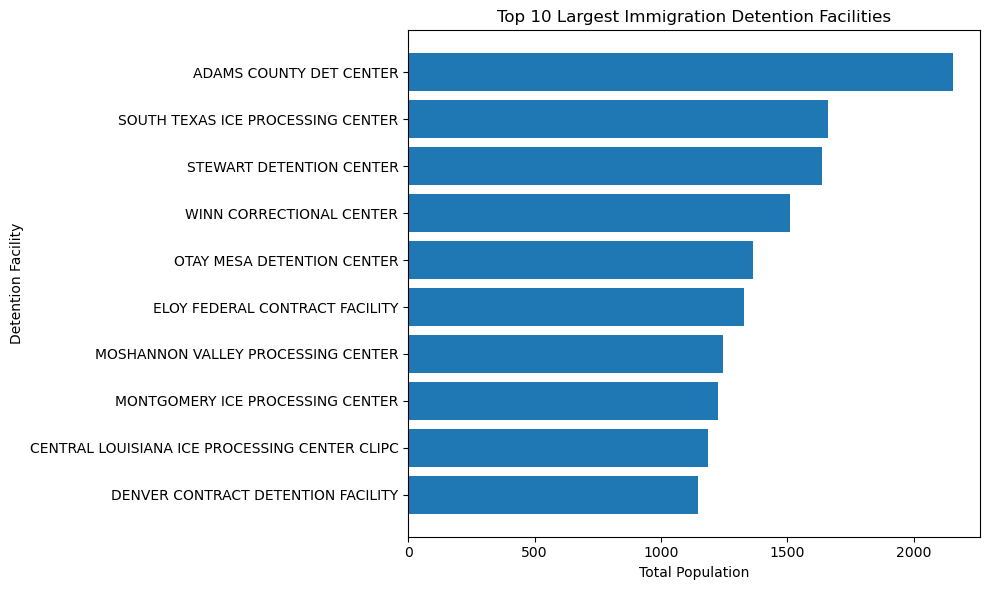

In [37]:
import matplotlib.pyplot as plt

#Visualize the top 10 largest detention facilities by total population

plt.figure(figsize=(10, 6))
plt.barh(
    top10['Name'],
    top10['Total Population']
)
plt.xlabel('Total Population')
plt.ylabel('Detention Facility')
plt.title('Top 10 Largest Immigration Detention Facilities')

plt.gca().invert_yaxis()  # largest at top
plt.tight_layout()
plt.savefig('..\\output\\top_10_detention_facilities.png', dpi=300)
plt.show()


## 5. Save the Cleaned Dataset
  This section saves the cleaned dataset in csv format


In [38]:
df.to_csv('..\\data\\processed\\cleaned_ice_detention.csv', index=False)  # Save cleaned dataset to CSV
top10.to_csv('..\\data\\processed\\top_10_detention_facilities.csv', index=False)  # Save top 10 dataset to CSV